In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [2]:
landslides=pd.read_csv('catalog.csv')

In [8]:
landslides.date.head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

In [9]:
np.random.seed(0)

In [12]:
type(print(landslides.date))

0        3/2/07
1       3/22/07
2        4/6/07
3       4/14/07
4       4/15/07
         ...   
1688    12/7/15
1689    2/22/16
1690    2/23/16
1691    2/26/16
1692     3/2/16
Name: date, Length: 1693, dtype: object


NoneType

In [13]:
landslides.date.dtype

dtype('O')

In [16]:
# convert date column to datetime

# Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. 
#This is called "parsing dates" because we're taking in a string and identifying its component parts.

In [17]:
# seems current date column in %m/%d/%y format

landslides['parsed_date']= pd.to_datetime( landslides.date, format='%m/%d/%y'  )

In [18]:
landslides

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,parsed_date
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,2007-03-02
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,2007-03-22
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,2007-04-06
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,2007-04-14
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN,2007-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,NaN,NaN,United States,US,North Carolina,1646,Tryon,7.80866,...,Landslide,Rockfall,Small,NaN,NaN,0.0,0.0,Tryon Daily Bulletin,http://www.tryondailybulletin.com/2016/02/26/u...,2015-12-07
1689,7537,2/22/16,0:00,NaN,United States,US,West Virginia,51400,Charleston,6.84721,...,Landslide,Mudslide,Small,Unknown,NaN,0.0,0.0,Charleston Gazette,http://www.wvgazettemail.com/news/20160222/us-...,2016-02-22
1690,7539,2/23/16,NaN,NaN,United States,US,West Virginia,2406,Welch,14.19735,...,Landslide,Landslide,Small,Rain,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/officials-cautio...,2016-02-23
1691,7540,2/26/16,21:06,NaN,United States,US,West Virginia,1048,Athens,12.00678,...,Landslide,Rockfall,Small,Unknown,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/rockslide-snarls...,2016-02-26


In [19]:
landslides.parsed_date.head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: parsed_date, dtype: datetime64[ns]

In [25]:
# get the day of month from date_parsed column

day_of_month= landslides['parsed_date'].dt.day

In [26]:
day_of_month.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: parsed_date, dtype: float64

In [27]:
# lets plot of the days

day_of_month=day_of_month.dropna()

<AxesSubplot:xlabel='parsed_date'>

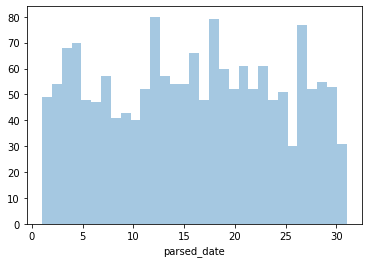

In [29]:
sns.distplot(day_of_month, kde=False, bins=31)


In [35]:
date_length= landslides.date.str.len()
date_length.value_counts()

7.0    1075
6.0     368
8.0     247
Name: date, dtype: int64

In [48]:
indi= np.where([date_length==8])[1]

In [49]:
indi

array([  44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   59,   60,   61,   63,   64,   65,   66,   67,   68,
         69,  151,  152,  153,  154,  155,  156,  157,  158,  159,  160,
        161,  162,  163,  164,  165,  166,  167,  168,  169,  170,  171,
        172,  173,  174,  217,  220,  221,  222,  227,  228,  229,  233,
        234,  235,  479,  480,  481,  482,  483,  484,  485,  486,  487,
        488,  489,  490,  491,  492,  493,  494,  495,  496,  497,  498,
        499,  516,  517,  518,  519,  520,  521,  522,  523,  524,  525,
        526,  527,  528,  529,  530,  531,  532,  533,  534,  535,  536,
        537,  538,  539,  540,  541,  542,  543,  544,  545,  546,  547,
        548,  549,  558,  559,  560,  561,  562,  563,  564,  565,  566,
        567,  568,  569,  570,  571,  572,  573,  574,  575,  823,  824,
        825,  826,  827,  828,  831,  832,  833,  834,  835,  836,  849,
        850,  851,  852,  853,  854,  855,  856,  8

In [50]:
landslides.loc[indi]

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,parsed_date
44,301,10/11/07,NaN,NaN,Costa Rica,CR,Alajuela,7014,Atenas,3.08459,...,Landslide,Mudslide,Large,Rain,NaN,NaN,14.0,"Agence France-Presse, afp.google.com",http://afp.google.com/article/ALeqM5hu6a8oyAM1...,2007-10-11
45,302,10/11/07,NaN,NaN,Costa Rica,CR,San José,26669,NaN,9.56251,...,Landslide,Landslide,Large,Rain,NaN,NaN,10.0,International Herald,http://www.iht.com/articles/ap/2007/10/12/amer...,2007-10-11
46,303,10/12/07,NaN,NaN,Haiti,HT,Ouest,3951,Cabaret,0.51272,...,Landslide,Complex,Large,Rain,NaN,NaN,23.0,Euronews.net,http://www.euronews.net/index.php?page=info&ar...,2007-10-12
47,304,10/12/07,NaN,NaN,Jamaica,JM,St. Elizabeth,1371,Maggotty,4.57363,...,Landslide,Complex,Medium,Rain,NaN,NaN,NaN,RadioJamaica,http://www.radiojamaica.com/content/view/2039/26/,2007-10-12
48,307,10/13/07,NaN,SA,Colombia,CO,Cauca,9985,Suárez,8.46579,...,Landslide,Mudslide,Large,Continuous rain,NaN,NaN,24.0,Reuters - AlertNet.org,http://www.reuters.com/article/newsOne/idUSN13...,2007-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,7507,11/11/15,NaN,NaN,Panama,PA,Chiriquí,2823,Monte Lirio,6.74338,...,Landslide,Landslide,Small,Downpour,NaN,0.0,0.0,Bugaba,http://www.soydebugaba.com/noticias/fuertes-ll...,2015-11-11
1670,7515,10/21/15,NaN,NaN,Mexico,MX,Chiapas,19092,Motozintla de Mendoza,2.06743,...,Landslide,Landslide,Medium,Rain,NaN,0.0,0.0,azteca noticias,http://www.aztecanoticias.com.mx/notas/estados...,2015-10-21
1671,7516,10/21/15,NaN,NaN,Mexico,MX,Chiapas,18608,Emiliano Zapata,4.68443,...,Landslide,Landslide,Medium,Rain,cold front No. 7,0.0,0.0,azteca noticias,http://www.aztecanoticias.com.mx/notas/estados...,2015-10-21
1673,7518,10/15/15,NaN,NaN,Mexico,MX,Tabasco,32415,Tenosique de Pino Suárez,15.22260,...,Landslide,Landslide,Medium,Flooding,NaN,0.0,0.0,ver tiente global,http://vertienteglobal.com/?p=49401,2015-10-15
